### Open CV installation
#### Once you install Anaconda Navigator, install the following packages
#### 1. pip install numpy
#### 2. pip install matplotlib
#### 3. pip install opencv-python


In [115]:
import os
import cv2 as cv
import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


## Reading an image

In OpenCv module,we can use the function cv2.imread() to read an image. When inputting the image path, the image should be in the working directory or a full path of image should be given.

cv2.IMREAD_COLOR − This function loads a color image and any transparency of image will be neglected. It is the default flag.

cv2.IMREAD_GRAYSCALE − This function loads image in grayscale mode

cv2.IMREAD_UNCHANGED − This function loads image as such including alpha channel


##### dmfd




In [116]:
path='G:/My Drive/DIP/Image_Processing/Image_Processing_basics/'

Text(0.5, 1.0, 'BGR color format')

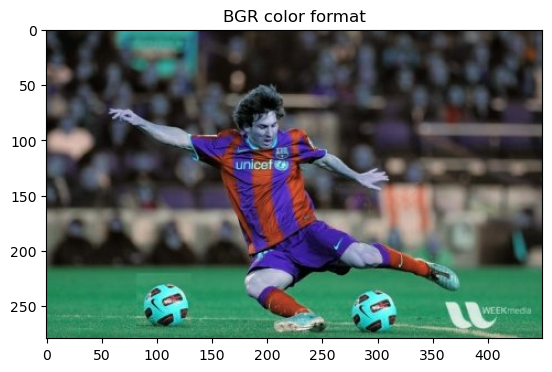

In [117]:
img = cv.imread(path+'messi5.jpg')
plt.imshow(img)
plt.title("BGR color format")

### The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

(280, 450, 3)


Text(0.5, 1.0, 'RGB color format')

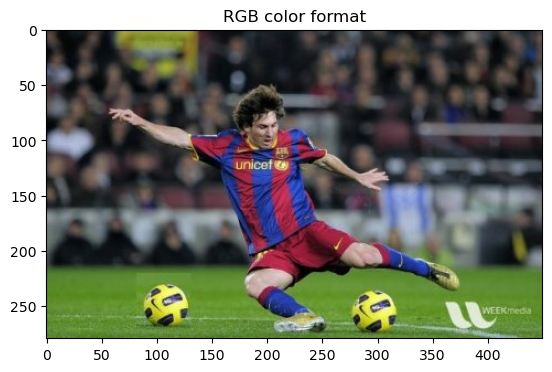

In [118]:
print(img.shape)
messi_img_channels_reversed = img[:, :, ::-1]
# we can also use cv2.cvtColor
plt.imshow(messi_img_channels_reversed)
plt.title("RGB color format")

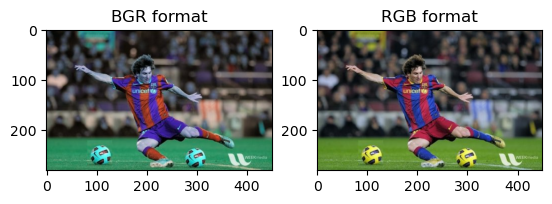

In [119]:
plt.subplot(121),plt.imshow(img),plt.title('BGR format')
plt.subplot(122),plt.imshow(messi_img_channels_reversed),plt.title('RGB format')
plt.show()

### Accessing Image Properties

1. shape- returns the matrix size.  R x C and no channels
2. 

In [120]:
print('shape of the image:',img.shape)  # shape of the image with rows and columns and No. of channels if the inage is color image
print('total number of pixels: ',img.size) # total number of pixels
print('data type:',img.dtype)  #data type
print(" R G B : ",img[100,100])  # returns the R G B value at 100,100 position
print('length of the image: ',len(img))  #  returns the no.of rows.

shape of the image: (280, 450, 3)
total number of pixels:  378000
data type: uint8
 R G B :  [57 63 68]
length of the image:  280


If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color. Using shape attribute.

In [121]:
print(img.shape)
size=1
for x in img.shape:
    print(size,' * ',x,' = ', end=' ')
    size = x*size
    print(size)
print(type(img.size))

(280, 450, 3)
1  *  280  =  280
280  *  450  =  126000
126000  *  3  =  378000
<class 'int'>


### Accessing and Modifying pixel values


In [122]:
px = img[100,100]
print("B G R values are :", end=' ')
print( px )
# accessing only blue pixel
blue = img[100,100,0]
print( blue )
green = img[100,100,1]
print( green )
red  = img[100,100,2]
print( red )


B G R values are : [57 63 68]
57
63
68


You can modify the pixel values the same way.

#### Image ROI
Sometimes, you will have to play with certain regions of images. For eye detection in images, first face detection is done over the entire image. When a face is obtained, we select the face region alone and search for eyes inside it instead of searching the whole image. It improves accuracy (because eyes are always on faces :D ) and performance (because we search in a small area).


ROI is again obtained using Numpy indexing. Here I am selecting the ball and copying it to another region in the image:

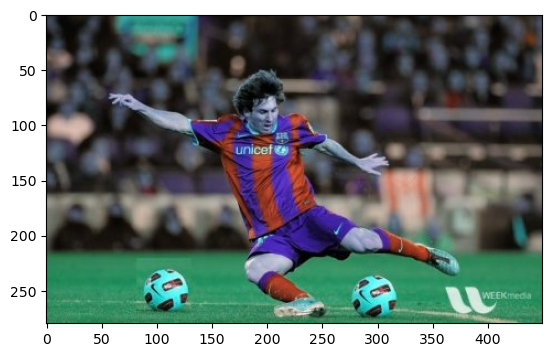

In [123]:
plt.imshow(img)

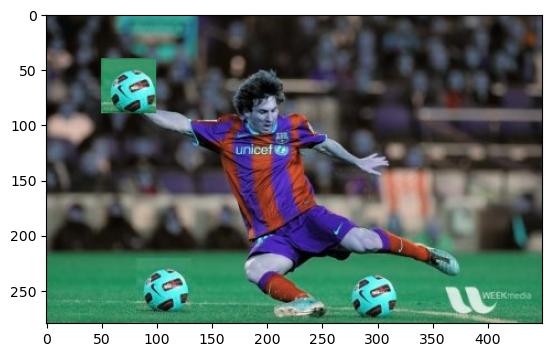

In [124]:
"""img[150:180,80:120] = [0,0,0]
plt.imshow(img)
black=img[150:180,80:120]
img[50:80,50:90]=black
"""
ball=img[220:270,80:130] 
#img[40:80,50:90]=[0,0,0]
img[40:90,50:100]=ball
plt.imshow(img)


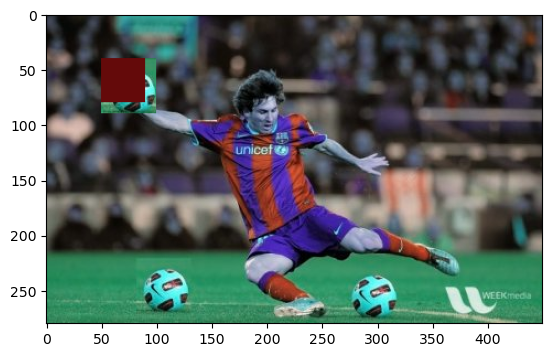

In [125]:
plt.imshow(img)
img[40:80,50:90]=[100,10,10]
plt.imshow(img)


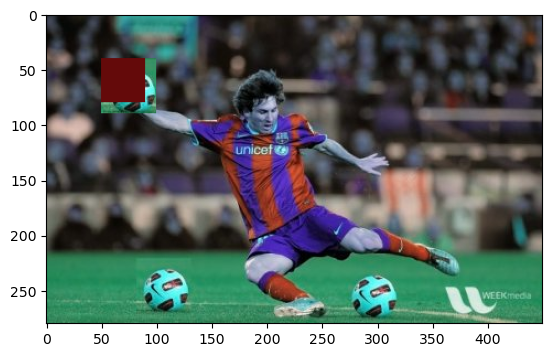

In [126]:
plt.imshow(img)


######  If you want to create a border around an image, something like a photo frame, you can use cv.copyMakeBorder(). 

But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

src - input image
top, bottom, left, right - border width in number of pixels in corresponding directions
borderType - Flag defining what kind of border to be added. It can be following types:
cv.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
color value - color for border
cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=RED)

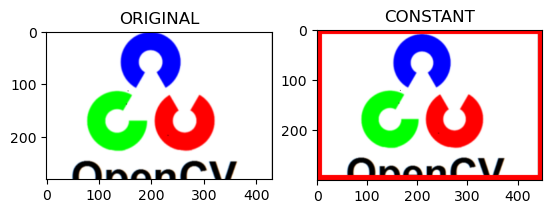

In [127]:
img1 = cv.imread(path+'opencv-logo.png')
RED=[255,0,0]
assert img1 is not None, "file could not be read, check with os.path.exists()"
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=RED)
plt.subplot(121),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(122),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

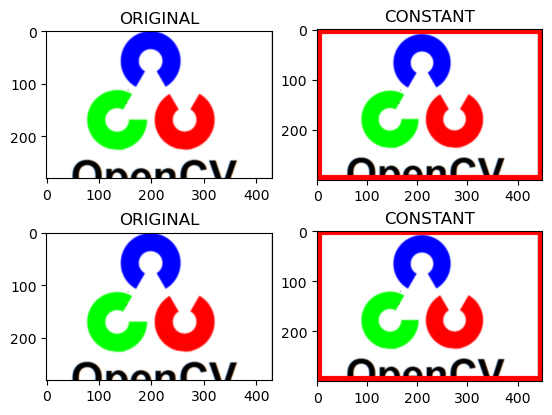

In [128]:
#""" 
plt.subplot(221),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(222),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.subplot(223),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(224),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()
#"""

### Goal
Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.
Learn these functions: cv.add(), cv.addWeighted(), etc.

##### Image Addition
You can add two images with the OpenCV function, cv.add(), or simply by the numpy operation res = img1 + img2. 

Both images should be of same depth and type, or the second image can just be a scalar value.

#### Note
###### There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [129]:
x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y))  # 250+10=> 255 saturation operation
print(x+y)  # modulo opertaion, 250,8 bits can store upto 255, 0,1,2,3,4  so value is 4 

[[255]]
[4]


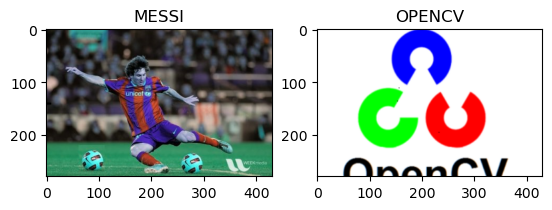

(280, 430, 3)
(280, 430, 3)


In [130]:
img1 = cv.imread(path+'messi5.png')
img2 = cv.imread(path+'opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

plt.subplot(121),plt.imshow(img1),plt.title('MESSI')
plt.subplot(122),plt.imshow(img2),plt.title('OPENCV')

plt.show()
print(img1.shape)
print(img2.shape)

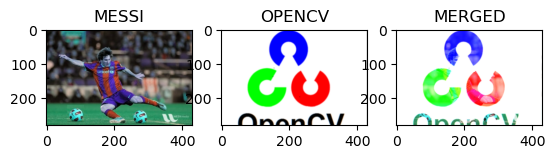

In [131]:
dst=cv.add(img1, img2)
plt.subplot(131),plt.imshow(img1),plt.title('MESSI')
plt.subplot(132),plt.imshow(img2),plt.title('OPENCV')
plt.subplot(133),plt.imshow(dst),plt.title('MERGED')

plt.show()


##### Image Blending
This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency. Images are added as per the equation below:

##### g(x)=(1−α)f0(x)+αf1(x)
By varying α from 0→1, you can perform a cool transition between one image to another.

Here I took two images to blend together. The first image is given a weight of 0.7 and the second image is given 0.3.
##### cv.addWeighted() applies the following equation to the image:

#### dst=α⋅img1+β⋅img2+γ

Here γ is taken as zero.

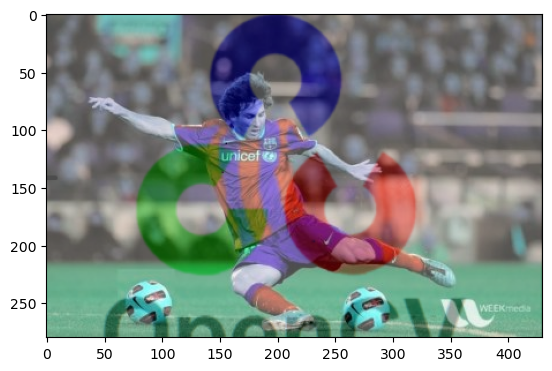

In [132]:
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst)

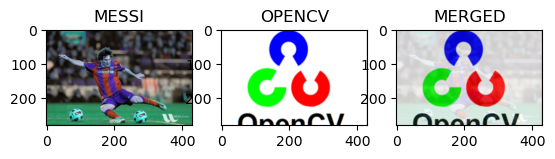

In [133]:
dst = cv.addWeighted(img1,0.2,img2,0.8,0)
plt.subplot(131),plt.imshow(img1),plt.title('MESSI')
plt.subplot(132),plt.imshow(img2),plt.title('OPENCV')
plt.subplot(133),plt.imshow(dst),plt.title('MERGED')

plt.show()


##### Bitwise Operations

This includes the bitwise AND, OR, NOT, and XOR operations. They will be highly useful while extracting any part of the image, defining and working with non-rectangular ROI's, and etc. Below we will see an example of how to change a particular region of an image.

I want to put the OpenCV logo above an image. If I add two images, it will change the color. If I blend them, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in the last chapter. But the OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as shown below:

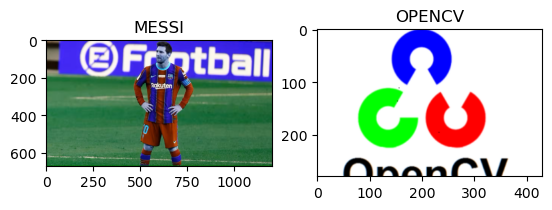

(667, 1200, 3)
(280, 430, 3)


In [134]:
# Load two images
img1 = cv.imread(path+'messi.png')
img2 = cv.imread(path+'opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

plt.subplot(121),plt.imshow(img1),plt.title('MESSI')
plt.subplot(122),plt.imshow(img2),plt.title('OPENCV')

plt.show()
print(img1.shape)
print(img2.shape)
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]



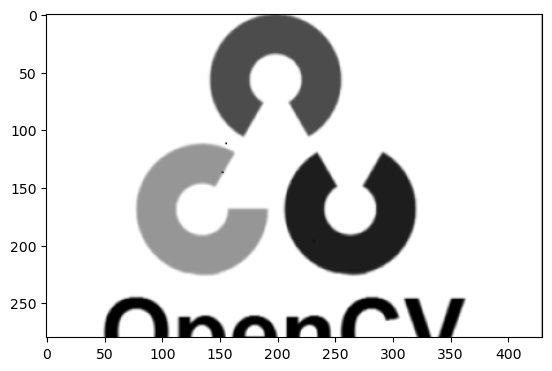

In [135]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

plt.imshow(img2gray, cmap='gray')


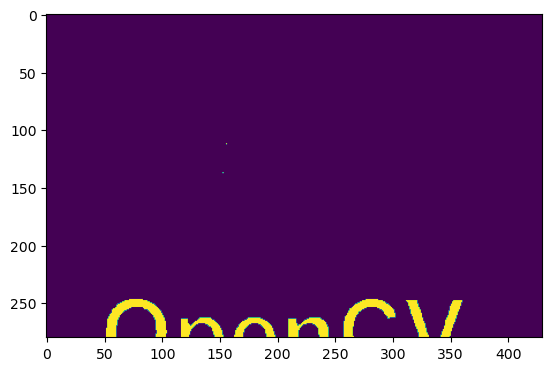

In [136]:

ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)

plt.imshow(mask_inv)


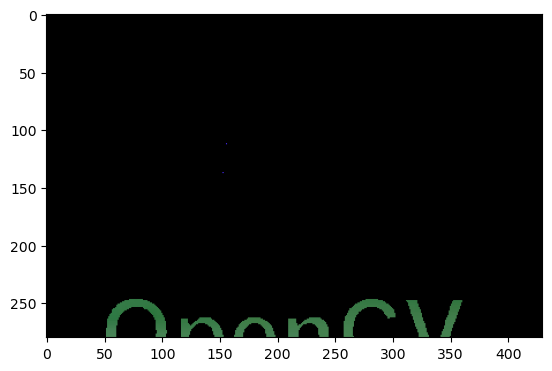

In [137]:

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

plt.imshow(img1_bg)
# Take only region of logo from logo image.


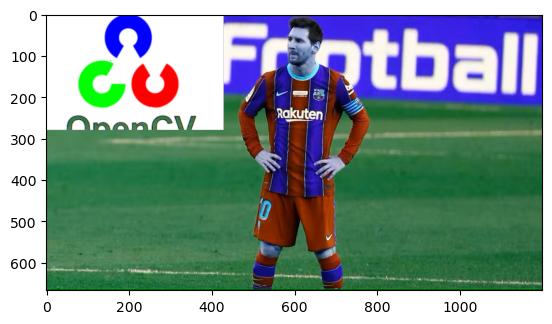

In [138]:

img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image

dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1)

# Goals

Learn to:

#### 1. Blur images with various low pass filters
#### 2. Apply custom-made filters to images (2D convolution)

#### 2D Convolution ( Image Filtering )


As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

OpenCV provides a function cv.filter2D() to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

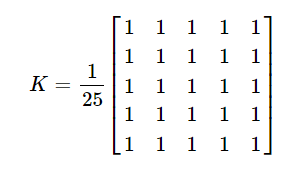
The operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image. Try this code and check the result:

K=1/9 * [ [1 0 1],
          [0,1,0],
          [1,0,1]
          ]
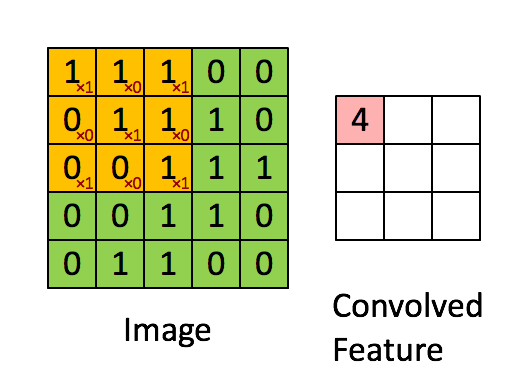

https://icecreamlabs.medium.com/3x3-convolution-filters-a-popular-choice-75ab1c8b4da8


In [139]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(path+'opencv_logo1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
kernel = np.ones((7,7),np.float32)/25
dst = cv.filter2D(img,-1,kernel)


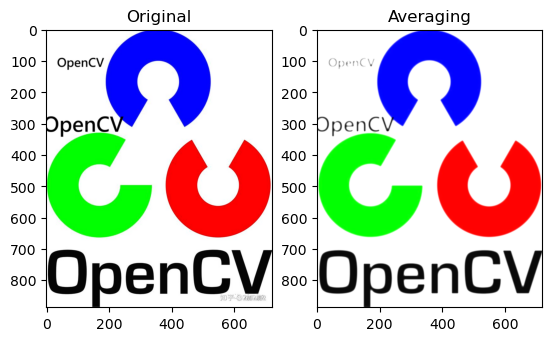

True

In [140]:
plt.subplot(121),plt.imshow(img),plt.title('Original')
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
#plt.xticks([]), plt.yticks([])
plt.show()
cv.imwrite(path+'opencv_blurred.png',dst)

### Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides four main types of blurring techniques.

1. Averaging
2. Gaussian Blurring
3. Median Blurring
4. Bilateral Filtering


#### 1. Averaging
This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function cv.blur() or cv.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of the kernel. A 3x3 normalized box filter would look like the below:

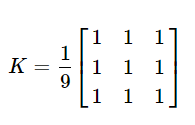

###### Note
If you don't want to use a normalized box filter, use cv.boxFilter(). Pass an argument normalize=False to the function.
Check a sample demo below with a kernel of 5x5 size:


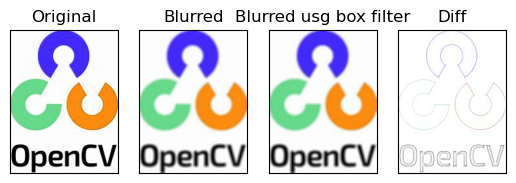

In [141]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(path+'opencv_logo.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.blur(img,(5,5))

dst=cv.boxFilter(img, -1, (5,5), normalize = True)
diff=cv.add(img,-dst)

plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dst),plt.title('Blurred usg box filter')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('Diff')
plt.xticks([]), plt.yticks([])

plt.show()

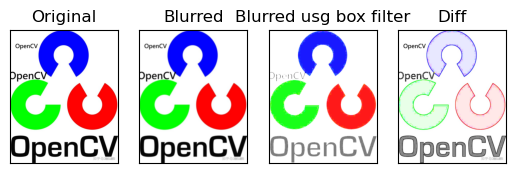

In [142]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(path+'opencv_logo1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.blur(img,(5,5))

dst=cv.boxFilter(img, -1, (5,5), normalize = False)
diff=cv.add(img,-dst)

plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dst),plt.title('Blurred usg box filter')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(diff),plt.title('Diff')
plt.xticks([]), plt.yticks([])

plt.show()

#### 2. Gaussian Blurring
In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, cv.getGaussianKernel().

The above code can be modified for Gaussian blurring:

In [143]:
blur = cv.GaussianBlur(img,(5,5),0)

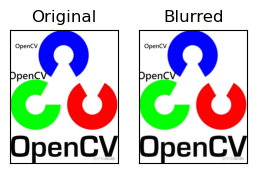

In [144]:
plt.subplot(141),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

(<matplotlib.image.AxesImage at 0x22898eaa650>, Text(0.5, 1.0, 'Original'))

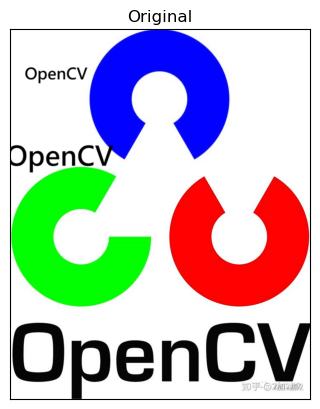

In [145]:
plt.xticks([]), plt.yticks([])
plt.imshow(img),plt.title('Original')


(<matplotlib.image.AxesImage at 0x2289ce67c10>, Text(0.5, 1.0, 'Blurred'))

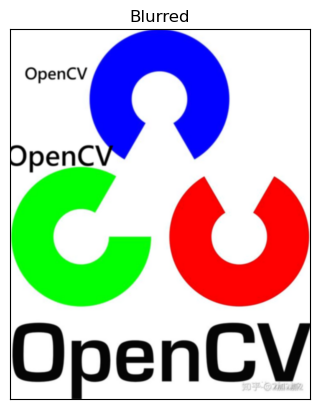

In [146]:
plt.xticks([]), plt.yticks([])
plt.imshow(blur),plt.title('Blurred')


(<matplotlib.image.AxesImage at 0x228963cd690>, Text(0.5, 1.0, 'Blurred'))

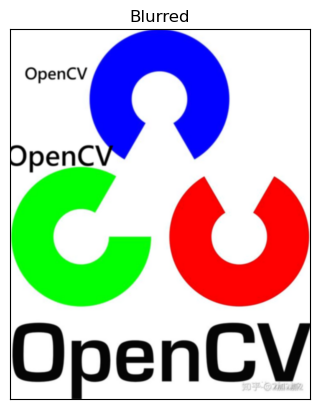

In [147]:
plt.xticks([]), plt.yticks([])
plt.imshow(blur),plt.title('Blurred')


## How to resize an image in OpenCV using Python?


Height and width of original image: 280, 430
New height and width: 340, 450
New height and width:  340 450


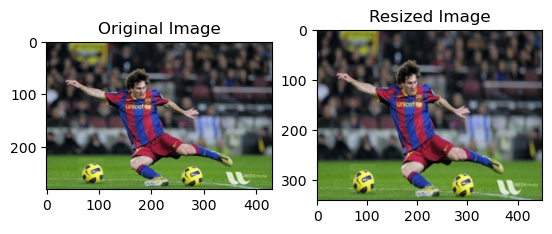

In [148]:
import cv2
import matplotlib.pyplot as plt

# read the input image
img = cv2.imread(path+'messi5.png')

h, w, c = img.shape

print(f"Height and width of original image: {h}, {w}" )

# resize the image
new_size = (450, 340) # new_size=(width, height)
print(f"New height and width: {new_size[1]}, {new_size[0]}" )
print("New height and width: ", new_size[1], new_size[0]  )

resize_img = cv2.resize(img, new_size)

# Convert the images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(img), plt.title("Original Image")
plt.subplot(122), plt.imshow(resize_img), plt.title("Resized Image")
plt.show()

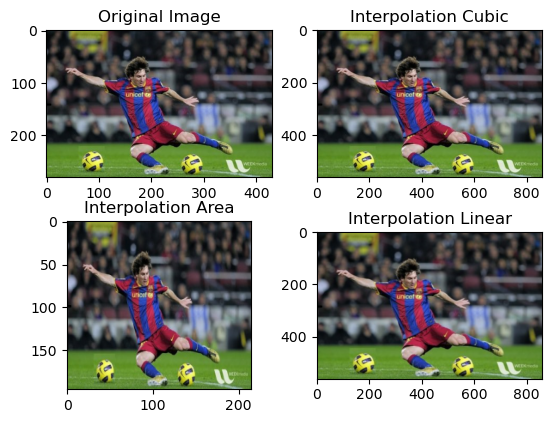

In [149]:
resize_cubic = cv2.resize(img,(0, 0),fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
resize_area = cv2.resize(img,(0, 0),fx=0.5, fy=0.7, interpolation = cv2.INTER_AREA)
resize_linear = cv2.resize(img,(0, 0),fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

# display the original and resized images
plt.subplot(221),plt.imshow(img), plt.title("Original Image")
plt.subplot(222), plt.imshow(resize_cubic), plt.title("Interpolation Cubic")
plt.subplot(223), plt.imshow(resize_area), plt.title("Interpolation Area")
plt.subplot(224), plt.imshow(resize_linear), plt.title("Interpolation Linear")
plt.show()

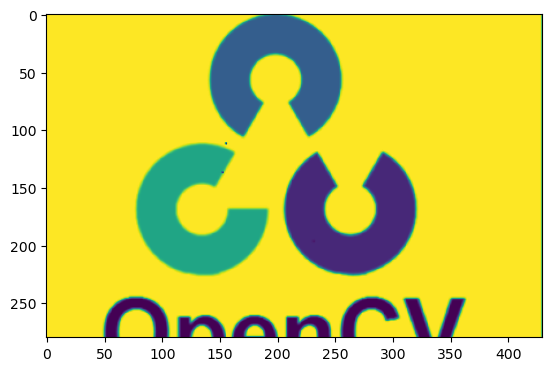

In [150]:
plt.imshow(img2gray)



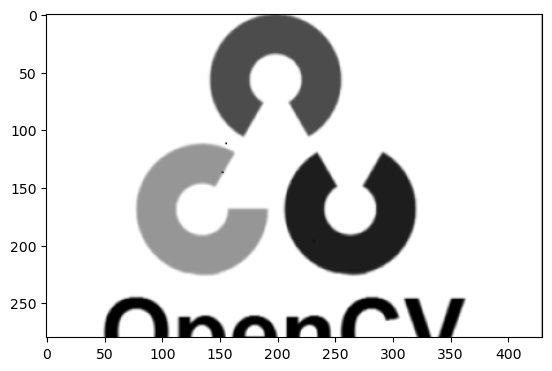

In [151]:
plt.imshow(img2gray, cmap='gray')
